In [2]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.image as mpimg
import numpy as np

In [26]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # print(np.argmin(D, axis = 1)) 
    # D = np.linalg.norm(X-centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
    return (centers, labels)

In [23]:
img = mpimg.imread('naruto.jpg')
# plt.imshow(img)
# imgplot = plt.imshow(img)
# plt.axis('off')
# plt.show() 

In [29]:
X.shape

(955328, 3)

In [33]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
K = 5
(center, label) = kmeans(X, K)


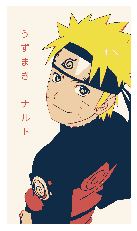

In [34]:
img_temp = np.zeros_like(X)
center = np.asarray(center[-1])
label = np.asarray(label[-1])
for k in range(K):
    img_temp[label == k] = center[k]
img_final = img_temp.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img_final, interpolation='nearest')
plt.axis('off')
plt.show()